# 分省指标数据之使用与制图
* 数据处理+制图 使用[pandas](http://pandas.pydata.org/pandas-docs/stable/install.html)
* 制图 使用 [bokeh](http://bokeh.pydata.org/en/latest/docs/installation.html)

## (1) 取/连结 数据

In [2]:
import pandas as pd   # 数据分析模块 （Python Data Analysis Library Python）

In [3]:
df_GDP= pd.read_table("fsnd_GDP_A020101.csv",   # 档名
                       encoding = 'utf8',       # 编码
                       header = 3,              # 指定数据的标题为原始数据之第3行
                       skiprows = [35,36],      # 原始数据之第35, 36行跳过不计
                       sep =','                 # 分隔符设为',' read_table内置分隔符为\t
                      )
df_POP= pd.read_table("fsnd_POP_A030101.csv",   # 档名
                       encoding = 'utf8',       # 编码
                       header = 3,              # 指定数据的标题为原始数据之第3行
                       skiprows = [35,36],      # 原始数据之第35, 36行跳过不计
                       sep =','                 # 分隔符设为',' read_table内置分隔符为\t
                      )


## (2) 准备 数据  （型态）


In [4]:
def prepare(df_in, l_variable, l_value):
    # 把df 的栏位用列表推导的方式清理掉'年'这个字符後转换成整数
    df = df_in.copy()
    df.columns = [ int(x.replace('年','')) if x!='地区' else x for x in df.columns]
    years = [ x for x in df.columns if x!='地区'] 
    df_out = pd.melt(df, id_vars=['地区'], value_vars=years)
    df_out.columns = ['地区', l_variable, l_value]
    df_out = df_out.set_index(['地区',  l_variable])
    return (df_out)

In [5]:
prepare(df_GDP, "年", "GDP")

,,GDP
地区,年,
北京市,2015,23014.59
天津市,2015,16538.19
河北省,2015,29806.11
山西省,2015,12766.49
内蒙古自治区,2015,17831.51
辽宁省,2015,28669.02
吉林省,2015,14063.13
黑龙江省,2015,15083.67
上海市,2015,25123.45


In [6]:
prepare(df_POP, "年", "POP")

,,POP
地区,年,
北京市,2015,2171
天津市,2015,1547
河北省,2015,7425
山西省,2015,3664
内蒙古自治区,2015,2511
辽宁省,2015,4382
吉林省,2015,2753
黑龙江省,2015,3812
上海市,2015,2415


## (3) 连结两个数据

In [7]:
df_p = prepare(df_GDP, "年", "GDP").join( prepare(df_POP, "年", "POP"), 
                                          how = "left" )
df_p 

,,GDP,POP
地区,年,,
北京市,2015,23014.59,2171
天津市,2015,16538.19,1547
河北省,2015,29806.11,7425
山西省,2015,12766.49,3664
内蒙古自治区,2015,17831.51,2511
辽宁省,2015,28669.02,4382
吉林省,2015,14063.13,2753
黑龙江省,2015,15083.67,3812
上海市,2015,25123.45,2415


In [8]:
df_p.query("年==2015")

,,GDP,POP
地区,年,,
北京市,2015,23014.59,2171
天津市,2015,16538.19,1547
河北省,2015,29806.11,7425
山西省,2015,12766.49,3664
内蒙古自治区,2015,17831.51,2511
辽宁省,2015,28669.02,4382
吉林省,2015,14063.13,2753
黑龙江省,2015,15083.67,3812
上海市,2015,25123.45,2415


## (4) 可视化 使用pands 自带的plot来制图

In [9]:
# 解决中文乱码问题
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False


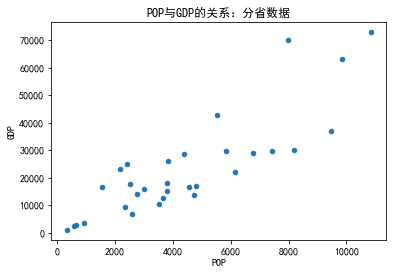

In [10]:
%matplotlib inline
df_p.query("年==2015").plot(kind='scatter', x='POP', y='GDP', 
          title = 'POP与GDP的关系：分省数据')

## (5) 用 numpy.polyfit 做线性回归

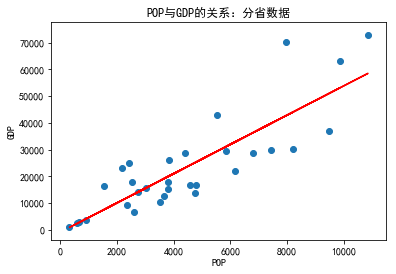

In [11]:
# Regression Using Pandas and Statsmodels
import numpy as np
x = df_p.query("年==2015")['POP']
y = df_p.query("年==2015")['GDP']
fit = np.polyfit(x=x , y=y, deg=1)

ax = df_p.query("年==2015").plot(kind='scatter', x='POP', y='GDP', 
          title = 'POP与GDP的关系：分省数据')
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

## (6) 可视化 使用bokeh 来制图，可交互（HoverTool tooltip）

In [29]:
# tooltip 工具提示 
df_p['desc'] = df_p.index.get_level_values(0)

# 制图
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import HoverTool, BoxSelectTool

title = '分省数据' 
xlabel = 'POP：人口' 
ylabel = 'GDP：产值'

hover = HoverTool(
    tooltips=[
        ( '人口',  '$x{0,F}'), 
        ( '产值',  '$y{0,F}'),
        ( '地区',  '@desc'  ),
    ]
)

TOOLS = [hover, "pan, wheel_zoom, box_zoom, reset, resize"]
fig = figure(plot_width=800, plot_height=600,
           x_axis_label = xlabel, y_axis_label = ylabel, 
           title=title, tools=TOOLS)

df_plot = df_p.query("年==2015")

fig.circle("POP", "GDP",
         source = df_plot,
         fill_alpha=0.6, line_color=None, size= 15)

#regression line
xs = [min(df_plot["POP"]), max(df_plot["POP"])]
fig.line(x=xs, y=[ fit[0] * x + fit[1] for x in xs] )

output_notebook() # 输出到IPython/Jupyter Notebook，若要输出到他处需调整
#output_file('by_provinces.htm') # 输出到 htm
show(fig)



Loading BokehJS ...

In [24]:
df_p.index.get_level_values(1)

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006],
           dtype='int64', name='年', length=310)

In [25]:
df_p.index.get_level_values(1).min()

2006

## (7) 可视化 使用bokeh 来制图，可交互（slider）

In [30]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show
from bokeh.models import CustomJS, Slider,HoverTool, BoxSelectTool
from bokeh.layouts import column

title = '分省数据' 
xlabel = 'POP：人口大小' 
ylabel = 'GDP：产值大小'
hover = HoverTool(
    tooltips=[
        ( '人口大小',  '$x{0,F}'), 
        ( '产值大小',  '$y{0,F}'),
        ( '地区',  '@desc'  ),
    ]
)

TOOLS = [hover, "pan, wheel_zoom, box_zoom, reset, resize"]

fig = figure(plot_width=800, plot_height=600,
           x_axis_label = xlabel, y_axis_label = ylabel, 
           title=title, tools=TOOLS)

yr_min = df_p.index.get_level_values(1).min()
df_plot = df_p.query("年=={yr}".format(yr=yr_min))
plt = fig.circle("POP", "GDP",
         source = df_plot,
         fill_alpha=0.6, line_color=None, size= 15)


def update_plot(year):
    #plt.data_source.data = df_p.query("年=={yr}".format(yr=year))
    plt.data_source.data['POP'] = list(df_p.query("年=={yr}".format(yr=year)).loc[:,['POP']].iloc[:,0].values)
    plt.data_source.data['GDP'] = list(df_p.query("年=={yr}".format(yr=year)).loc[:,['GDP']].iloc[:,0].values)
    plt.data_source.data['地区_年'] = [(x[0],int(year)) for x in plt.data_source.data['地区_年']]

    push_notebook(handle=bokeh_handle)  
    print (year)
    ##### new notebook cell #####

callback = CustomJS(code="""
if (IPython.notebook.kernel !== undefined) {
    var kernel = IPython.notebook.kernel;
    cmd = "update_plot(" + cb_obj.value + ")";
    kernel.execute(cmd, {}, {});
}
""")

slider = Slider(start=df_p.index.get_level_values(1).min(), 
                end=df_p.index.get_level_values(1).max(),
                value=1,
                step=1,
                title="年",
                callback=callback)
output_notebook()

bokeh_handle = show(column(slider, fig), notebook_handle=True)

Loading BokehJS ...